<h1><center><font size="6">Heart Disease Indicator EDA</font></center></h1>

<h2><center><font size="4">Dataset used: Heart Disease Indicator</font></center></h2>

<img src="https://ysm-res.cloudinary.com/image/upload/v1/yms/prod/c18d1b49-703d-483e-94e6-c91e4b121d09" width="500"></img>

<br>

# Introduction

## Writter

Milestone 1 Phase 0 

Name : Dicky Gabriel

Batch : SBY-002

Objective: Explatory data analysis(EDA) from heart disease indicator data and make next plan or conclusion from EDA

Tableau Dashboard: https://public.tableau.com/app/profile/dicky.sarumpaet/viz/h8dsft_Milestone1_/Story1?publish=yes

# Problem Identification

## SMART Analysis

Specific = Identifying external and internal factors that have the greatest impact on heart disease

Measure = Biggest factor in external and internal that have biggest correlation with heart disease

Achiavable = Analyzing and visualizing all the external and internal factor will allow us to know the top indicators that cause heart disease

Relevant = Knowing what indicators have a big impact on heart disease will make it easier for us to focus on avoiding or reducing these indicators

Time Bound = Achieve in 1 week


### Problem Statement

The goal is to Identifying substance external factors that have the greatest impact on heart disease based from correlation. This will be achieved by Analyzing and visualizing all the indicators, if we know the indicators that have a big impact on heart disease it will make easier for healthcare to focus on prevent or reducing these indicators it will be achieve in one week

## 5W + 1H

1. Which state has the most people affected by heart disease? (vizualisation)
2. What age category is most affected by heart disease?(vizualisation)
3. Which ethnicity and gender have higher risk to get heart disease?(vizualisation)
4. Which smoker status have higher risk to get heart disease?(vizualisation)
5. What alcohol drinker status have higher risk to get heart disease? (vizualisation)
6. what alcohol e-ciggarate have higher risk to get heart disease?(vizualisation)
7. are alcohol drinkers and Heart Disease have significant correlation?(inferential)
8. How much percentage for people who belong to former smoker,never drunk, and never use eciggarete?(diferential)

# Prepare For Data Analysis

## Load Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})

## Load data

Data from: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data

In [4]:
df = pd.read_csv("heart_2022_no_nans.csv")

In [5]:
pd.set_option("display.max.columns", None)
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 60 to 64,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 25 to 29,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,No,Yes,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Multiracial, Non-Hispanic",Age 65 to 69,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [7]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

# Data Cleaning

## Handling Missing Value

In [8]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

There is no missing value, so there is no need to handle the missing value

In [9]:
#Change all column name to lower case
df.columns = df.columns.str.lower()

Change all column name to lower case make us more easier to call column because we dont need to think if its lower or uppercase

## Unique Data In Column With More Than 2 Category

In [10]:
#Call unique value in general health column
df["generalhealth"].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

There is 5 unique value from generalhealth column

In [11]:
#Replace string in generalhealth column
df["generalhealth"] = df["generalhealth"].str.replace("Very good", "Excellent") #change very good to excellent
df["generalhealth"] = df["generalhealth"].str.replace("Good", "Excellent") #change good to excellent

#Call unique value after we replace string
df["generalhealth"].unique()

array(['Excellent', 'Fair', 'Poor'], dtype=object)

Change very good and good to excellent, because the difference between that three is confusing and it help us to view general health more easy from not healthy, neutral, and healty.

In [12]:
#Call unique value in removedteeth column
df["removedteeth"].unique()

array(['None of them', '6 or more, but not all', '1 to 5', 'All'],
      dtype=object)

There is 4 unique value in removedteeth column, its 'None of them', '6 or more, but not all', '1 to 5', and 'All'

In [13]:
#Replace string in generalhealth column
df["removedteeth"] = df["removedteeth"].str.replace("None of them", "none") #change none of them to none
df["removedteeth"] = df["removedteeth"].str.replace("6 or more, but not all", "teeth remove, but not all") #change 6 or more, but not all to teeth remove, but not all
df["removedteeth"] = df["removedteeth"].str.replace("1 to 5", "teeth remove, but not all") #change 1 to 5 to teeth remove, but not all

#Call unique value after we replace string
df["removedteeth"].unique()

array(['none', 'teeth remove, but not all', 'All'], dtype=object)

- Change None of them to none, to make it more simple and clear
- Change "6 or more, but not all" and "1 to 5" to one category string named "teeth remove, but not all", because it will make more sense and more general when we want to analyze the data for people who never have teeth remove, teet remove but not all, and all teeth is removed

In [14]:
#Call unique value in smokerstatus column
df["smokerstatus"].unique()

array(['Former smoker', 'Never smoked',
       'Current smoker - now smokes every day',
       'Current smoker - now smokes some days'], dtype=object)

There is 4 unique value in smokerstatus column, its 'Former smoker', 'Never smoked', 'Current smoker - now smokes every day', and 'Current smoker - now smokes some days'

In [15]:
#Replace string in smokerstatus column
df["smokerstatus"] = df["smokerstatus"].str.replace("Current smoker - now smokes every day", "Current smoker") #change Current smoker - now smokes every day to Current smoker
df["smokerstatus"] = df["smokerstatus"].str.replace("Current smoker - now smokes some days", "Current smoker") #change Current smoker - now smokes some days to Current smoker

#Call unique value after we replace string
df["smokerstatus"].unique()

array(['Former smoker', 'Never smoked', 'Current smoker'], dtype=object)

Make "Current smoker - now smokes some days" and "Current smoker - now smokes every day" to one category string name current smoker, because it will make us more easy to analyze data for people who are former smoker, current smoker, and never smoked 

In [16]:
#Call unique value in ecigaretteusage column
df["ecigaretteusage"].unique()

array(['Never used e-cigarettes in my entire life', 'Use them some days',
       'Not at all (right now)', 'Use them every day'], dtype=object)

There is 4 unique value in ecigaretteusage column, its 'Never used e-cigarettes in my entire life', 'Use them some days', 'Not at all (right now)',and 'Use them every day'

In [17]:
#Replace string in ecigaretteusage column
df["ecigaretteusage"] = df["ecigaretteusage"].str.replace("Never used e-cigarettes in my entire life", "Never") #Never used e-cigarettes in my entire life to Never
df["ecigaretteusage"] = df["ecigaretteusage"].str.replace("Use them some days", "Vaper") #Use them some days to Vaper
df["ecigaretteusage"] = df["ecigaretteusage"].str.replace("Use them every day", "Vaper") #Use them every day to Vaper
df["ecigaretteusage"] = df["ecigaretteusage"].str.replace("Not at all (right now)", "Former vaper") #Not at all (right now) to Former vaper

#Call unique value after we replace string
df["ecigaretteusage"].unique()

array(['Never', 'Vaper', 'Former vaper'], dtype=object)

- Change Never used e-cigarettes in my entire life to never, because its too long and doesn't give additional information 
- Change "Use them some days" and "Use them every day" to one category string name vaper, because they are basically the same thing 
- Change Not at all (right now) to Former Vaper, because it make it more simple and easy to understand 

In [18]:
df["raceethnicitycategory"].unique()

array(['White only, Non-Hispanic', 'Black only, Non-Hispanic',
       'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic',
       'Hispanic'], dtype=object)

There is 5 unique value in raceethnicitycategory column, its 'White only, Non-Hispanic', 'Black only, Non-Hispanic', 'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic', and 'Hispanic'

In [19]:
df["agecategory"].unique()

array(['Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older',
       'Age 50 to 54', 'Age 40 to 44', 'Age 60 to 64', 'Age 55 to 59',
       'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29', 'Age 30 to 34',
       'Age 18 to 24'], dtype=object)

- There is 13 unique value in agecategory column
- Each category has an age range of 5 years, but there is 3 category that doesnt follow that rule it is "Age 18 to 24", "Age 30 to 34", and "Age 80 or older" (maybe because in that 3 category the data for each age is small)
- The youngest age category is "Age 18 to 24" and the older age category is "Age 80 or older"

In [20]:
df["agecategory"] = df["agecategory"].str.replace("Age ", "")
df["agecategory"] = df["agecategory"].str.replace(" to ", "-")
df["agecategory"].unique()

array(['65-69', '70-74', '75-79', '80 or older', '50-54', '40-44',
       '60-64', '55-59', '45-49', '35-39', '25-29', '30-34', '18-24'],
      dtype=object)

In [21]:
df["tetanuslast10tdap"].unique()

array(['Yes, received Tdap',
       'Yes, received tetanus shot but not sure what type',
       'No, did not receive any tetanus shot in the past 10 years',
       'Yes, received tetanus shot, but not Tdap'], dtype=object)

There is 4 unique value in tetanuslast10tdap column, its 'Yes, received Tdap', 'Yes, received tetanus shot but not sure what type', 'No, did not receive any tetanus shot in the past 10 years', and 'Yes, received tetanus shot, but not Tdap'

In [22]:
#Rename column name
df.rename(columns = {'tetanuslast10tdap':'tetanusvaclast10yrs'}, inplace = True) # rename column tetanuslast10tdap to tetanusvaclast10yrs

#Replace string in tetanusvaclast10yrs column
df["tetanusvaclast10yrs"] = df["tetanusvaclast10yrs"].str.replace("Yes, received Tdap", "Yes") #Never used e-cigarettes in my entire life to Never
df["tetanusvaclast10yrs"] = df["tetanusvaclast10yrs"].str.replace("Yes, received tetanus shot but not sure what type", "Yes") #Use them some days to Vaper
df["tetanusvaclast10yrs"] = df["tetanusvaclast10yrs"].str.replace("No, did not receive any tetanus shot in the past 10 years", "No") #Use them every day to Vaper
df["tetanusvaclast10yrs"] = df["tetanusvaclast10yrs"].str.replace("Yes, received tetanus shot, but not Tdap", "Yes") #Not at all (right now) to Former vaper

#Call unique value after we replace string
df["tetanusvaclast10yrs"].unique()

array(['Yes', 'No'], dtype=object)

- Column name tetanuslast10tdap  do not give us general description about the data, after we add the years to specify the 10 and change tdap to vac for make it more general we get column name tetanusvaclast10yrs that give us more description about what is data inside the column
- Replace "Yes, received Tdap", "Yes, received tetanus shot but not sure what type", and "Yes, received tetanus shot, but not Tdap" to "Yes" , because after change the column name all people who get vaccinated is the same even if they have different type of tetanus vaccine
- Replace "No, did not receive any tetanus shot in the past 10 years" to "No" , because it make it more simple and easy to understand 

# EDA

In this EDA section we will explore and analyze region factor, internal factor, and external factor. Why we do not analyze health aspect because our objective is not to predict if people will get heart disease or not but our objective is to know factor that we can change to prevent heart disease

## Region Factor

### State

In [23]:
state_heart = df.groupby(['state','hadheartattack']).size().reset_index(name='count')

# Group by 'agecategory' and calculate the total count for each agecategory
total_counts = state_heart.groupby('state')['count'].transform('sum')

# Calculate the percentage
state_heart["percentage"] = state_heart['count'] * 100 / total_counts

state_heart

,state,hadheartattack,count,percentage
0,Alabama,No,1778,93.480547
1,Alabama,Yes,124,6.519453
2,Alaska,No,3040,94.851794
3,Alaska,Yes,165,5.148206
4,Arizona,No,5103,93.427316
...,...,...,...,...
103,West Virginia,Yes,246,8.271688
104,Wisconsin,No,5799,94.662096
105,Wisconsin,Yes,327,5.337904
106,Wyoming,No,2289,94.979253


In [24]:
state_heart[state_heart["hadheartattack"] == "Yes"].sort_values("percentage", ascending=False).head()

,state,hadheartattack,count,percentage
7,Arkansas,Yes,244,8.299320
103,West Virginia,Yes,246,8.271688
19,Florida,Yes,557,7.614491
41,Maine,Yes,425,7.068019
57,Nebraska,Yes,344,6.735853


- 5 states with the highest percentage of heart disease is Arkansas,West Virginia, Florida, Maine,and Nebraska
- State with highest highest percentage of heart disease is Arkansas 8.3%

In [25]:
state_heart[state_heart["hadheartattack"] == "Yes"].sort_values("percentage", ascending=True).head()

,state,hadheartattack,count,percentage
97,Virgin Islands,Yes,25,3.364738
17,District of Columbia,Yes,59,3.420290
11,Colorado,Yes,210,4.070556
63,New Jersey,Yes,162,4.083690
29,Illinois,Yes,108,4.142693


- 5 states with the lowest percentage of heart disease is Virgin island, District of Columbia, Colorado, New Jersey and Illinois
- State with lowest percentage of heart disease is Virgin Islands 3.4%

Insight: The different percentages of heart disease in each state can be caused by differences in the lifestyle of each citizen, like maybe in state where so many fast food restaurant make them obese and tend to get hearth disease or maybe in state where hearth disease percentage is low, there is gym culture and make them more healthy 

## Internal Factor

Internal factor divide by age,sex,and race even though we can't change our internal factor but this info can help healthcare in prioritizing patient also we can analyze the behaviour

### Age

In [26]:
df["agecategory"].value_counts()

agecategory
65-69          28557
60-64          26720
70-74          25739
55-59          22224
50-54          19913
75-79          18136
80 or older    17816
40-44          16973
45-49          16753
35-39          15614
30-34          13346
18-24          13122
25-29          11109
Name: count, dtype: int64

- The biggest data in agecategory is 65-69 by 28557 data
- The lowest data in agecatory is 25-29 by 11109

In [92]:
# Group by 'agecategory' and 'hadheartattack', calculate count, and reset index
age_heart = df.groupby(['agecategory', 'hadheartattack']).size().reset_index(name='count')

# Group by 'agecategory' and calculate the total count for each agecategory
total_counts = age_heart.groupby('agecategory')['count'].transform('sum')

# Calculate the percentage
age_heart["percentage"] = (age_heart['count']*100 / total_counts).round(2)

age_heart

,agecategory,hadheartattack,count,percentage
0,18-24,No,13072,99.62
1,18-24,Yes,50,0.38
2,25-29,No,11062,99.58
3,25-29,Yes,47,0.42
4,30-34,No,13256,99.33
5,30-34,Yes,90,0.67
6,35-39,No,15458,99.00
7,35-39,Yes,156,1.00
8,40-44,No,16745,98.66
9,40-44,Yes,228,1.34


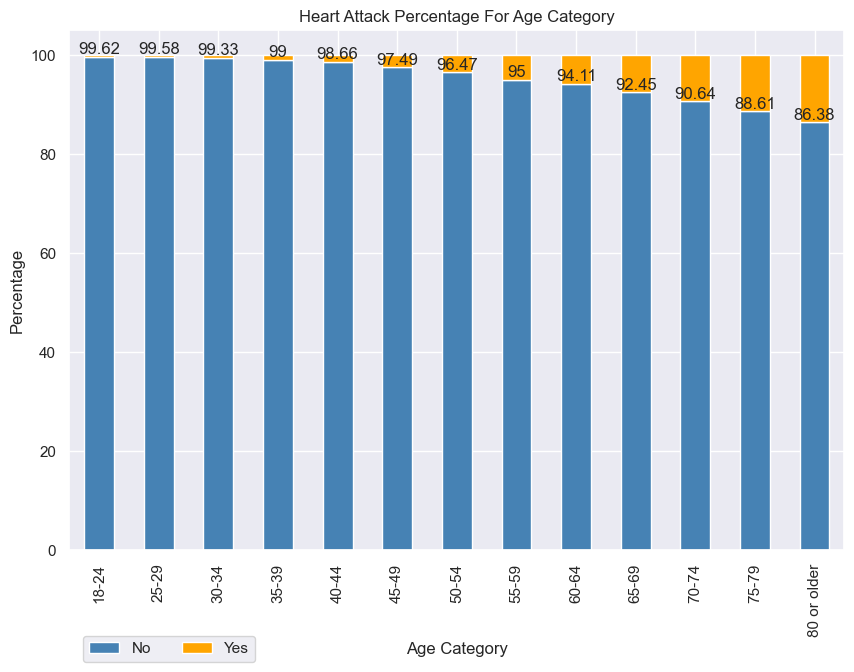

In [93]:
fig, axes = plt.subplots(figsize=(10,8))

#Make new dataframe for stacked bar
pivot = age_heart.pivot(index='agecategory', columns='hadheartattack', values='percentage')
pivot.plot(kind='bar', stacked=True, color=['steelblue', 'orange'], ax = axes);

#Add Labels
plt.xlabel('Age Category');
plt.ylabel('Percentage');
plt.title('Heart Attack Percentage For Age Category');
axes.bar_label(axes.containers[0])
fig.subplots_adjust(top=0.76)

#Adjust legend 
plt.legend(bbox_to_anchor=(0.25,-0.15),ncol=2)


- The age category with the lowest heart disease percentage is in the 18-24 age category 
- The age category with the highet heart disease percentage is in the 80 or older age category
- The older a person is, the higher the chance of developing heart disease

##### Race

In [29]:
# Group by 'raceethnicitycategory' and 'hadheartattack', calculate count, and reset index
race_heart = df.groupby(['raceethnicitycategory', 'hadheartattack']).size().reset_index(name='count')
race_heart_yes = race_heart[race_heart['hadheartattack'] == 'Yes']

race_heart_yes

,raceethnicitycategory,hadheartattack,count
1,"Black only, Non-Hispanic",Yes,889
3,Hispanic,Yes,859
5,"Multiracial, Non-Hispanic",Yes,340
7,"Other race only, Non-Hispanic",Yes,591
9,"White only, Non-Hispanic",Yes,10756


In [144]:
total_counts = race_heart.groupby('raceethnicitycategory')['count'].transform('sum')

# Calculate the percentage
race_heart["percentage"] = (race_heart['count']*100 / total_counts).round(2)

race_heart_yes = race_heart[race_heart['hadheartattack'] == 'Yes']

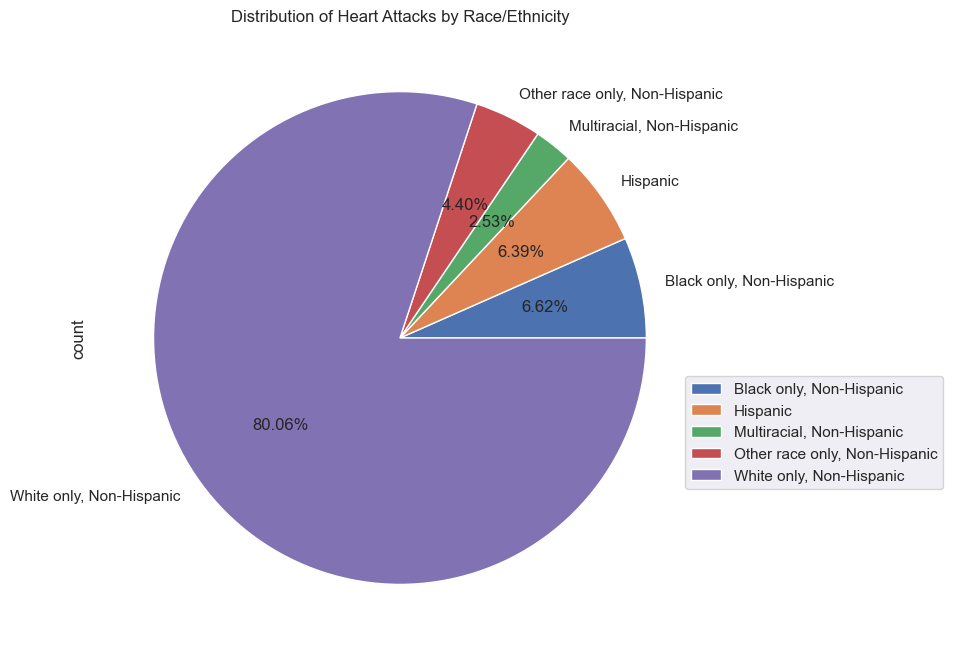

In [141]:
fig, ax1 = plt.subplots(figsize=(8, 8))


race_heart_yes[['raceethnicitycategory', 'count']].plot(kind='pie', y='count', labels=race_heart_yes['raceethnicitycategory'], autopct='%.2f%%', ax=ax1)

# Add title
plt.title('Distribution of Heart Attacks by Race/Ethnicity')

#Adjust legend
plt.legend(bbox_to_anchor=(0.95,0.45),ncol=1)

plt.show()

- The highest percentage of ethnicity in data is white only, non hispanic by 80.06%
- The lowest percentage of ethnicity in data is multiracial, non hispanic by 2.53%

### Sex

In [96]:
# Group by 'sex' and 'hadheartattack', calculate count, and reset index
sex_heart = df.groupby(['sex', 'hadheartattack']).size().reset_index(name='count')

# Group by 'sex' and calculate the total count for each agecategory
total_counts = sex_heart.groupby('sex')['count'].transform('sum')

# Calculate the percentage
sex_heart["percentage"] = (sex_heart['count']*100 / total_counts).round(2)

sex_heart

,sex,hadheartattack,count,percentage
0,Female,No,122879,96.14
1,Female,Yes,4932,3.86
2,Male,No,109708,92.81
3,Male,Yes,8503,7.19


In [98]:
sex_heart_yes = sex_heart[sex_heart["hadheartattack"]=="Yes"]

[Text(0, 0, '3.86'), Text(0, 0, '7.19')]

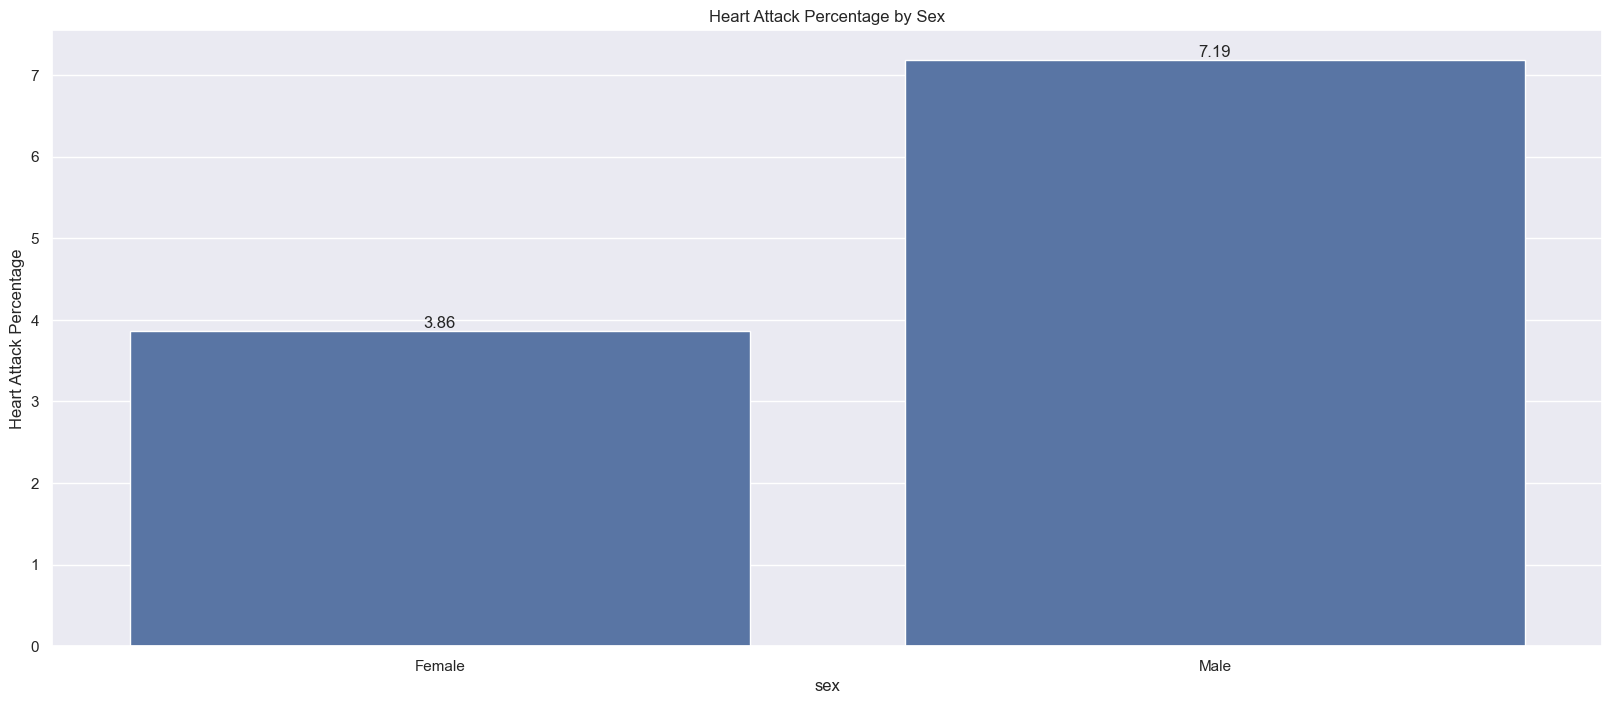

In [100]:
sns.barplot(x = 'sex',
            y = 'percentage',
            data = sex_heart_yes)

plt.title("Heart Attack Percentage by Sex")
plt.xlabel("sex")
plt.ylabel("Heart Attack Percentage")

ax = plt.gca()
ax.bar_label(ax.containers[0])

info: 
- Male have more percentage to get heart attack than female

Insight: 
Male tend to get heart attack maybe because their habits or activity that different than female and increase more than twice posibility to get heart disease

### Sex and Race relation

In [101]:
# Group by 'sex', 'age','race, and 'hadheartattack', calculate count also reset index
sex_age_race_heart = df.groupby(['sex',"raceethnicitycategory", 'hadheartattack']).size().reset_index(name='count')

# Group by 'sex' and calculate the total count for each agecategory
total_counts = sex_age_race_heart.groupby(['sex',"raceethnicitycategory"])['count'].transform('sum')

# Calculate the percentage
sex_age_race_heart["percentage"] = (sex_age_race_heart['count']*100 / total_counts).round(2)

sex_age_race_heart.sort_values(by = "count", ascending= False)

,sex,raceethnicitycategory,hadheartattack,count,percentage
8,Female,"White only, Non-Hispanic",No,92178,96.05
18,Male,"White only, Non-Hispanic",No,83402,92.29
2,Female,Hispanic,No,11411,96.93
0,Female,"Black only, Non-Hispanic",No,10834,96.02
12,Male,Hispanic,No,10300,95.39
10,Male,"Black only, Non-Hispanic",No,7607,94.53
19,Male,"White only, Non-Hispanic",Yes,6965,7.71
16,Male,"Other race only, Non-Hispanic",No,5851,93.81
6,Female,"Other race only, Non-Hispanic",No,5763,96.57
9,Female,"White only, Non-Hispanic",Yes,3791,3.95


- Most of the data are female White only, Non-Hispanic ethnicity
- Least of the data are male Multiracial, Non-Hispanic

In [102]:
sex_age_race_heart_yes = sex_age_race_heart[sex_age_race_heart["hadheartattack"]=="Yes"]

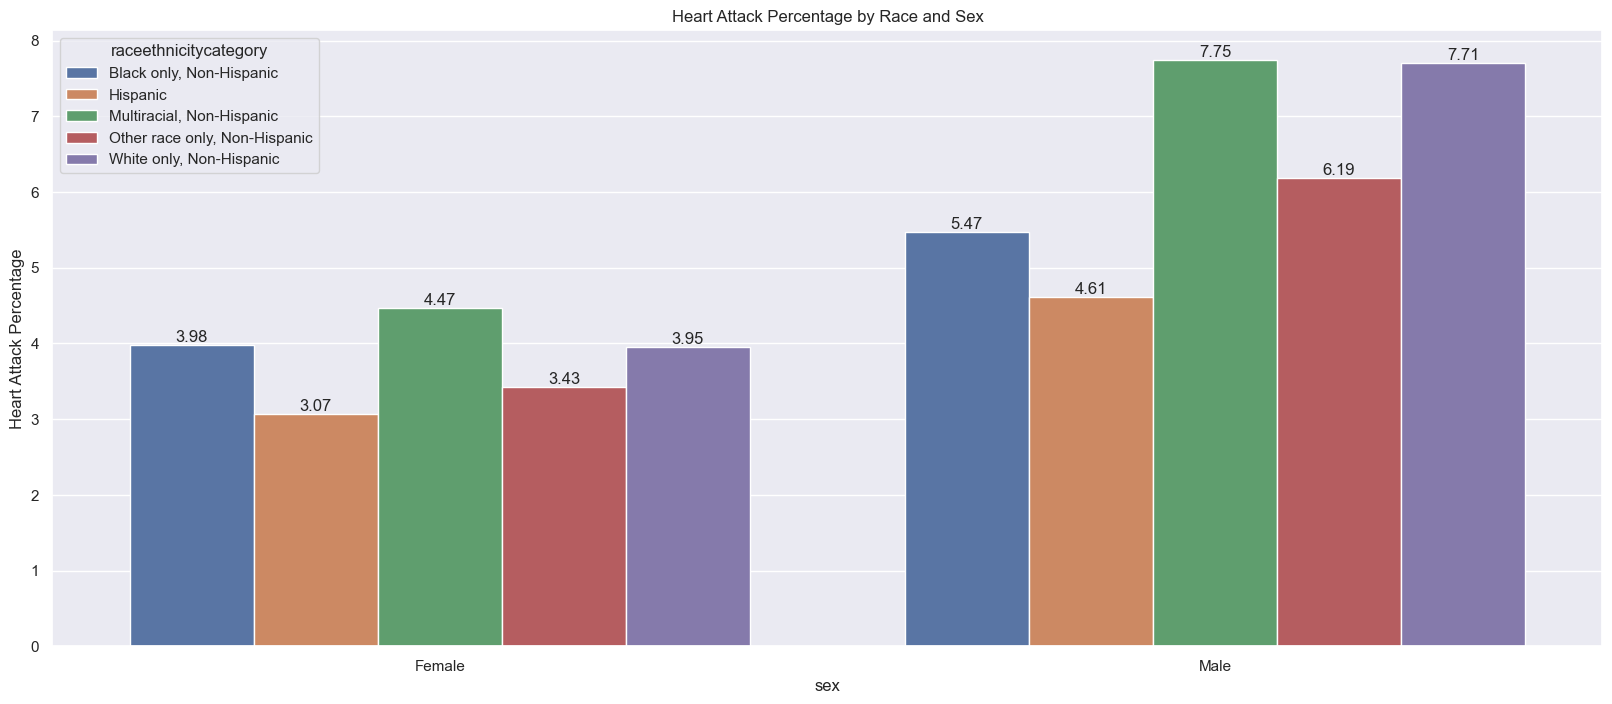

In [106]:
sns.barplot(x = 'sex',
            y = 'percentage',
            hue= 'raceethnicitycategory',
            data = sex_age_race_heart_yes)

plt.title("Heart Attack Percentage by Race and Sex")
plt.xlabel("sex")
plt.ylabel("Heart Attack Percentage")
ax = plt.gca()

for a in range (5):
    ax.bar_label(ax.containers[a])

- The highest percentage of hearth disease come from male multiracial non hispanic and male white non hispanic
- The lowest percentage of hearth disease come from female hispanic
- The lowest percentage of heart disease from male side is male hispanic
- The highest percentage of hearth disease from female side is female multiracial non hispanic

Insight: 

If you look at the data, the ethnicity with the highest chance of developing heart disease is non-Hispanic white in both sexes, even though
If you look at the prosperity of white Americans who are the wealthiest among other races, this could be due to the unhealthy lifestyle of white Americans, for example eating junk food, liking to drink alcohol, smoking, etc. An unhealthy lifestyle could be due to the average white American's life being so prosperous that they no longer think about their expenses.

In contrast to non-Hispanic whites, those occupying the lowest possible percentage in both genders are Hispanics. The Hispanic race is a race that mostly lives in poverty, but strangely they are known to be healthier than other races in the United States, so the term "Hispanic Paradox" emerged, on average, Hispanic people tend to like to eat fruit, exercise and rarely smoke, so they can That alone is the cause of the low percentage of heart disease in this race

Source:

["Household Income"](https://www.pgpf.org/blog/2023/11/income-and-wealth-in-the-united-states-an-overview-of-recent-data)

["Hispanic Paradox"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3673509/)

## External Factor

External factor divide by substance and habits, this section is the main focus for what we can change or prevent to happen for reduce posibility to get hearth disease

### Substance

#### Smoker

In [107]:
# Group by 'smokerstatus' and 'hadheartattack', calculate count, and reset index
smoker_heart = df.groupby(['smokerstatus', 'hadheartattack']).size().reset_index(name='count')

# Group by 'smokerstatus' and calculate the total count for each agecategory
total_counts = smoker_heart.groupby('smokerstatus')['count'].transform('sum')

# Calculate the percentage
smoker_heart["percentage"] = (smoker_heart['count']*100 / total_counts).round(2)

smoker_heart

,smokerstatus,hadheartattack,count,percentage
0,Current smoker,No,27404,92.09
1,Current smoker,Yes,2354,7.91
2,Former smoker,No,62917,91.81
3,Former smoker,Yes,5610,8.19
4,Never smoked,No,142266,96.30
5,Never smoked,Yes,5471,3.70


In [108]:
# Make data frame contain only people with hearth attack
smoker_heart_yes = smoker_heart[smoker_heart["hadheartattack"]=="Yes"]
smoker_heart_yes

,smokerstatus,hadheartattack,count,percentage
1,Current smoker,Yes,2354,7.91
3,Former smoker,Yes,5610,8.19
5,Never smoked,Yes,5471,3.70


[Text(0, 0, '7.91'), Text(0, 0, '8.19'), Text(0, 0, '3.7')]

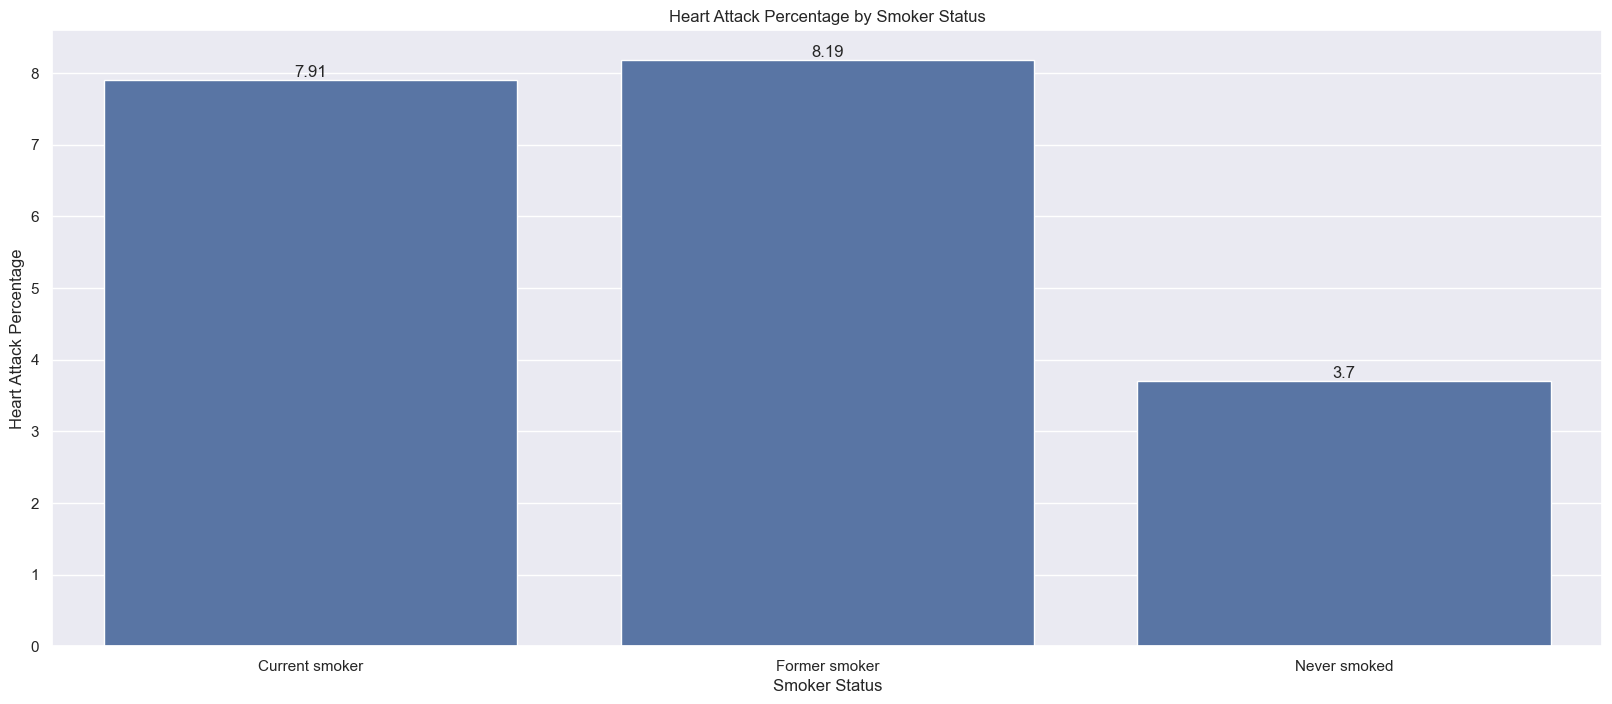

In [109]:
sns.barplot(x = 'smokerstatus',
            y = 'percentage',
            data = smoker_heart_yes)

plt.title("Heart Attack Percentage by Smoker Status")
plt.xlabel("Smoker Status")
plt.ylabel("Heart Attack Percentage")

ax = plt.gca()
ax.bar_label(ax.containers[0])

- Former smoker is the highest percentage have hearth disease, but the percentage similiar with current smoker
- people who have smoked tend to have 2 times more percentage get hearth disease than people who never smoke

Insight:

Smoking damages the heart and blood vessels very quickly thats why people who have smoke tend to get hearth disease than people who never smoke

source: 

["smoking affect"]("https://www.nhlbi.nih.gov/health/heart/smoking")

**Case**: 'Correlation' between Smoking Behaviour and Heart Disease

Conducting a Chi-Squared Hypothesis Test

H0: There is no relationship between Smoking Behaviour and Heart Disease.

H1: There is a relationship between Smoking Behaviour and Heart Disease.


In [79]:
#Contingency Table
contingency_table = pd.crosstab(df['smokerstatus'],df['hadheartattack'])
contingency_table

hadheartattack,No,Yes
smokerstatus,,
Current smoker,27404,2354
Former smoker,62917,5610
Never smoked,142266,5471


In [80]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.0


Critical value: 0.05

p-val = 0.0 < critical value

H0 rejected sucessfully

**Conclusion**:

There is a significance relationship between smoker status and heart attack, where people who ever smoke have highest percentage to get heart atack.

#### E-Ciggarate

In [110]:
# Group by 'ecigaretteusage' and 'hadheartattack', calculate count, and reset index
eciggarete_heart = df.groupby(['ecigaretteusage', 'hadheartattack']).size().reset_index(name='count')

# Group by 'ecigaretteusage' and calculate the total count for each agecategory
total_counts = eciggarete_heart.groupby('ecigaretteusage')['count'].transform('sum')

# Calculate the percentage
eciggarete_heart["percentage"] = (eciggarete_heart['count']*100 / total_counts).round(2)

eciggarete_heart

,ecigaretteusage,hadheartattack,count,percentage
0,Former vaper,No,40846,94.37
1,Former vaper,Yes,2435,5.63
2,Never,No,179556,94.44
3,Never,Yes,10572,5.56
4,Vaper,No,12185,96.61
5,Vaper,Yes,428,3.39


In [111]:
# Make data frame contain only people with hearth attack
eciggarete_heart_yes = eciggarete_heart[eciggarete_heart["hadheartattack"]=="Yes"]
eciggarete_heart_yes

,ecigaretteusage,hadheartattack,count,percentage
1,Former vaper,Yes,2435,5.63
3,Never,Yes,10572,5.56
5,Vaper,Yes,428,3.39


[Text(0, 0, '5.63'), Text(0, 0, '5.56'), Text(0, 0, '3.39')]

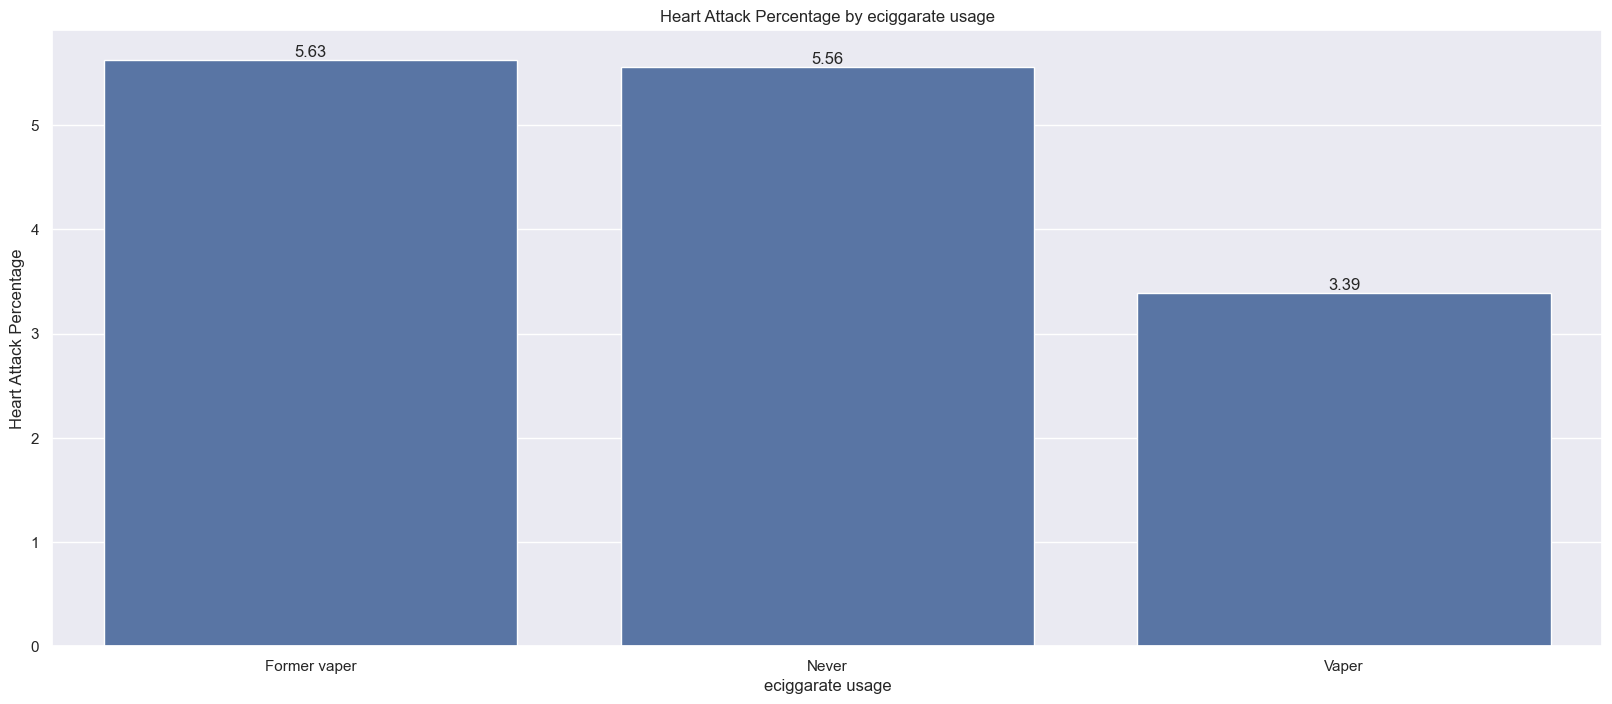

In [112]:
sns.barplot(x = 'ecigaretteusage',
            y = 'percentage',
            data = eciggarete_heart_yes)

plt.title("Heart Attack Percentage by eciggarate usage")
plt.xlabel("eciggarate usage")
plt.ylabel("Heart Attack Percentage")

ax = plt.gca()
ax.bar_label(ax.containers[0])

- Former vaper have highest percentage get heart disease
- Never and former vaper have similiar percentage to get heart disease
- Vaper is the lowest percentage to get heart disease

Insight:

In studies related to the effect of ecigarate on humans and heart health it should have a negative value, meaning that the more often a person uses ecigarate the higher the chance of developing heart disease. The low probability of vapers getting heart disease compared to people who have never used ecigarate at all may be caused by several things, for example the vaper data is very small so it cannot describe the whole eciggarate user, recorded vaper users have a healthier lifestyle than non-vapers, or maybe there is no significant correlation between people who ever use e-ciggarate and people who never use e-ciggarate

Source:
["e-ciggarate effect"]("https://www.bhf.org.uk/informationsupport/heart-matters-magazine/news/e-cigarettes")

**Case**: 'Correlation' between E-ciggarate user and Heart Disease

Conducting a Chi-Squared Hypothesis Test

H0: There is no relationship between E-ciggarate user and Heart Disease.

H1: There is a relationship between E-ciggarate user and Heart Disease.


In [82]:
#Contingency Table
contingency_table = pd.crosstab(df['ecigaretteusage'],df['hadheartattack'])
contingency_table

hadheartattack,No,Yes
ecigaretteusage,,
Former vaper,40846,2435
Never,179556,10572
Vaper,12185,428


In [83]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 1.0766462246137703e-24


Critical value: 0.05

p-val =1.0766462246137703e-24 < critical value

H0 rejected sucessfully

**Conclusion**:

There is a significance relationship between E-ciggarate user and Heart Disease

#### Alcohol 

In [113]:
# Group by 'alcoholdrinkers' and 'hadheartattack', calculate count, and reset index
alcohol_heart = df.groupby(['alcoholdrinkers', 'hadheartattack']).size().reset_index(name='count')

# Group by 'alcoholdrinkers' and calculate the total count for each agecategory
total_counts = alcohol_heart.groupby('alcoholdrinkers')['count'].transform('sum')

# Calculate the percentage
alcohol_heart["percentage"] = (alcohol_heart['count']*100 / total_counts).round(2)

alcohol_heart

,alcoholdrinkers,hadheartattack,count,percentage
0,No,No,102606,92.68
1,No,Yes,8109,7.32
2,Yes,No,129981,96.06
3,Yes,Yes,5326,3.94


In [114]:
# Make data frame contain only people with hearth attack
alcohol_heart_yes = alcohol_heart[alcohol_heart["hadheartattack"]=="Yes"]
alcohol_heart_yes

,alcoholdrinkers,hadheartattack,count,percentage
1,No,Yes,8109,7.32
3,Yes,Yes,5326,3.94


[Text(0, 0, '7.32'), Text(0, 0, '3.94')]

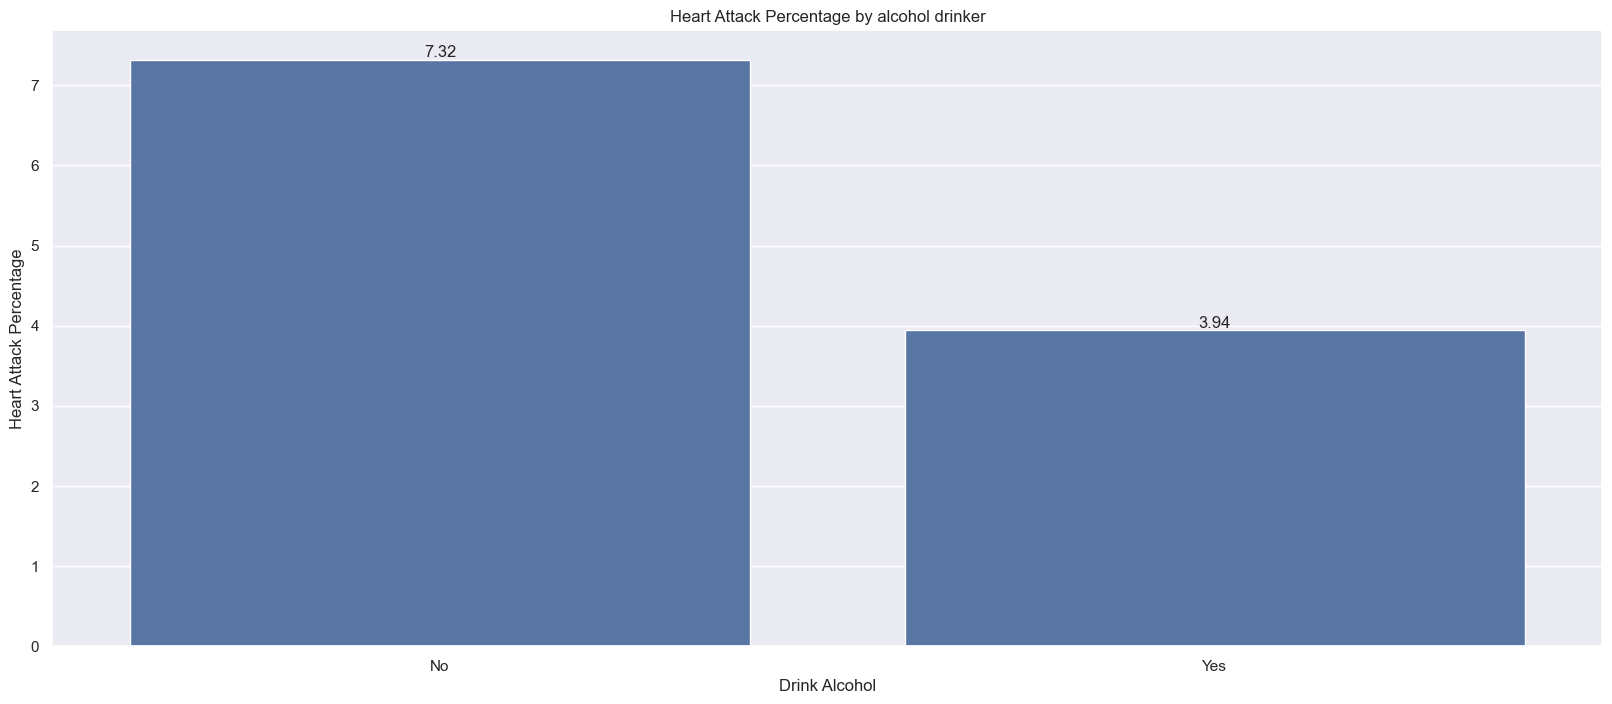

In [115]:
sns.barplot(x = 'alcoholdrinkers',
            y = 'percentage',
            data = alcohol_heart_yes)

plt.title("Heart Attack Percentage by alcohol drinker")
plt.xlabel("Drink Alcohol")
plt.ylabel("Heart Attack Percentage")

ax = plt.gca()
ax.bar_label(ax.containers[0])


- People who do not drink alcohol have more high percentage to get heart attack 

Insight: 

People who do not drink alcohol from the data maybe have more good habits or lifestyle than people who drink alcohol, or maybe there is slim correlation between drink alcohol and hearth disease

**Case**: 'Correlation' between alcohol drinkers and Heart Disease

Conducting a Chi-Squared Hypothesis Test

H0: There is no relationship between alcohol drinkers and Heart Disease.

H1: There is a relationship between alcohol drinkers and Heart Disease.


In [84]:
#Contingency Table
contingency_table = pd.crosstab(df['alcoholdrinkers'],df['hadheartattack'])
contingency_table

hadheartattack,No,Yes
alcoholdrinkers,,
No,102606,8109
Yes,129981,5326


In [85]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 3.175611575035547e-296


Critical value: 0.05

p-val =3.175611575035547e-296 < critical value

H0 rejected sucessfully

**Conclusion**:

There is a significance relationship between alcohol drinkers and Heart Disease

#### Smoker - Alcohol - E-Ciggarate

In [116]:
# Group by 'smokerstatus', 'age','ecigaretteusage, 'alcoholdrinkers', and 'hadheartattack', calculate count also reset index
smoke_drink_alcohol_heart = df.groupby(['smokerstatus',"ecigaretteusage","alcoholdrinkers", 'hadheartattack']).size().reset_index(name='count')

# Group by 'sex' and calculate the total count for each agecategory
total_counts = smoke_drink_alcohol_heart.groupby(['smokerstatus',"ecigaretteusage","alcoholdrinkers"])['count'].transform('sum')

# Calculate the percentage
smoke_drink_alcohol_heart["percentage"] = (smoke_drink_alcohol_heart['count']*100 / total_counts).round(2)

smoke_drink_alcohol_heart

,smokerstatus,ecigaretteusage,alcoholdrinkers,hadheartattack,count,percentage
0,Current smoker,Former vaper,No,No,4442,89.85
1,Current smoker,Former vaper,No,Yes,502,10.15
2,Current smoker,Former vaper,Yes,No,5902,94.95
3,Current smoker,Former vaper,Yes,Yes,314,5.05
4,Current smoker,Never,No,No,6650,88.89
5,Current smoker,Never,No,Yes,831,11.11
6,Current smoker,Never,Yes,No,6837,93.19
7,Current smoker,Never,Yes,Yes,500,6.81
8,Current smoker,Vaper,No,No,1345,92.76
9,Current smoker,Vaper,No,Yes,105,7.24


In [117]:
smoke_drink_alcohol_heart[smoke_drink_alcohol_heart["hadheartattack"]=="Yes"].sort_values(by="percentage",ascending=False)

,smokerstatus,ecigaretteusage,alcoholdrinkers,hadheartattack,count,percentage
17,Former smoker,Never,No,Yes,2503,11.84
5,Current smoker,Never,No,Yes,831,11.11
13,Former smoker,Former vaper,No,Yes,636,10.34
1,Current smoker,Former vaper,No,Yes,502,10.15
9,Current smoker,Vaper,No,Yes,105,7.24
7,Current smoker,Never,Yes,Yes,500,6.81
19,Former smoker,Never,Yes,Yes,1830,6.70
15,Former smoker,Former vaper,Yes,Yes,461,5.33
29,Never smoked,Never,No,Yes,3086,5.18
21,Former smoker,Vaper,No,Yes,103,5.12


- People that belong to former smoker,never use ciggarate, and not alcohol drinker have the highest percentage to get heart disease 
- People that belong to never smoke, vaper, and drink alcohol have the lowest percentage to get heart disease
- Top 3 percentage highest heart disease percentage is people that ever smoke
- Top 3 percentage lowest heart disease percentage is people who never smoke

insight: 

people that belong to current smoker, vaper, and not alcohol drinker surprisingly not with the highest percentage, also if we see former vaper and never use other substance have higher percentage to get heart disease than people who drink alcohol but not use other substance. The major factor that can increase heart percentage from data is ciggarate or people who ever smoke

# Conclusion

The biggest factor that lead to heart disease among 3 substance external factor is ciggarate or people who ever use smoke, so if government want to deal with heart disease issue they can make policy to reduce smoker or ciggarate in USA. Also from this fact if hospital or some organization want to make some campaign to prevent heart disease they can make some ads to never smoke or stop ciggarate  

From the internal factor we know that people who get old tend to get higher risk for heart disease, this information can help hospital or even government prioritize older people and make healthcare for older people more easy.From internal factor we also know that white male non hispanic have highest percentage to get hearth disease

From region data we know that state with highest percentage to get hearth disease is Arkansas, this information can help government to focus more on arkansas by tighten smoking ban and campaigning for a healthy lifestyle